Dataset Shape: (1797, 64) (Samples, Features)
Classes: [0 1 2 3 4 5 6 7 8 9]

--- Model Performance ---
Logistic Regression: Accuracy = 0.9722 | F1 Score = 0.9723
KNN: Accuracy = 0.9750 | F1 Score = 0.9748
Decision Tree: Accuracy = 0.8500 | F1 Score = 0.8498
Random Forest: Accuracy = 0.9750 | F1 Score = 0.9750
Naive Bayes: Accuracy = 0.7667 | F1 Score = 0.7638
SVM: Accuracy = 0.9806 | F1 Score = 0.9805


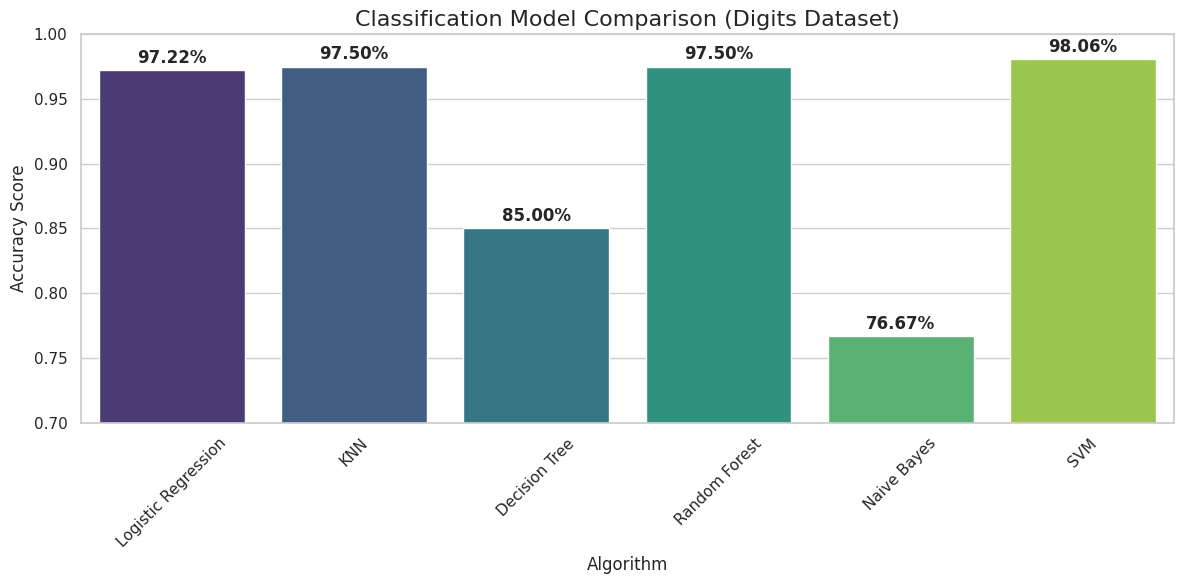

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# 1. Load the Dataset (Handwritten Digits)
data = load_digits()
X = data.data
y = data.target

print(f"Dataset Shape: {X.shape} (Samples, Features)")
print(f"Classes: {np.unique(y)}")

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Data Scaling
# KNN, SVM, and Logistic Regression perform poorly if data isn't scaled.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 5. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

# 6. Train and Evaluate
results = []

print("\n--- Model Performance ---")
for name, model in models.items():
    # Train the model
    # Note: Tree-based models (DT, RF) and NB don't strictly need scaling, but it doesn't hurt them. SVM/KNN/LogReg strictly need it.
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') # Weighted for multi-class

    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})
    print(f"{name}: Accuracy = {acc:.4f} | F1 Score = {f1:.4f}")

# 7. Convert results to DataFrame for easy plotting
df_results = pd.DataFrame(results)

# 8. Visualization
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Create Bar Plot
ax = sns.barplot(x="Model", y="Accuracy", data=df_results, palette="viridis", hue="Model")

# Add text labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontweight='bold')

plt.title("Classification Model Comparison (Digits Dataset)", fontsize=16)
plt.ylim(0.7, 1.0) # Zoom in to show differences (Scale 70% to 100%)
plt.ylabel("Accuracy Score")
plt.xlabel("Algorithm")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()